<a href="https://colab.research.google.com/github/LeyanTang/ML-DL-Project/blob/main/Classification%20project%20-%20Phishing%20Susceptibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries & load the datasets

In [236]:
# import basic libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_palette("pastel")

import warnings
warnings.simplefilter("ignore", UserWarning)

%precision 4

'%.4f'

In [237]:
test = pd.read_csv('Phishing_Test.csv')
train = pd.read_csv('Phishing_Train.csv')
df = pd.concat([test, train], ignore_index=True)

# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4540 entries, 0 to 4539
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Visit                   4540 non-null   object 
 1   Tool_Det_Accuracy       4540 non-null   int64  
 2   Tool_Det_Time           4540 non-null   int64  
 3   Threat_Domain           4540 non-null   int64  
 4   Threat_Type             4540 non-null   int64  
 5   Threat_Cost             4540 non-null   int64  
 6   Dem_Gender              4540 non-null   int64  
 7   Dem_Age                 4540 non-null   int64  
 8   Dem_Education           4540 non-null   int64  
 9   Exp_Web_Reliance        4540 non-null   float64
 10  Exp_Trust_Web           4540 non-null   float64
 11  Exp_Past_Loss           4540 non-null   float64
 12  Exp_Past_Enc            4540 non-null   float64
 13  Exp_Risk_Prop           4540 non-null   float64
 14  Exp_Sec_Habit           4540 non-null   

In [ ]:
df.shape

(4540, 27)

In [ ]:
df.describe()

,Tool_Det_Accuracy,Tool_Det_Time,Threat_Domain,Threat_Type,Threat_Cost,Dem_Gender,Dem_Age,Dem_Education,Exp_Web_Reliance,Exp_Trust_Web,...,ThreatPer_Sus,ThreatPer_Sev,Exp_Self_Eff,ToolPer_Effort_Req,ToolPer_Cost_Det_Error,ToolPer_Usefulness,ToolPer_Trust_Det,Exp_Fam_Dom,Exp_Fam_Site,Tool_Warning
count,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,...,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000
mean,0.509912,0.497797,0.537445,0.500000,0.498899,0.405286,6.169604,3.287445,7.735830,6.397109,...,4.848954,6.249339,6.430039,4.198210,5.240198,5.798651,5.636619,3.566189,1.845551,0.663656
std,0.499957,0.500050,0.498651,0.500055,0.500054,0.491001,8.285357,1.046389,1.501242,1.384585,...,1.967101,2.820462,2.022379,1.660798,2.395256,2.225003,2.187485,2.523355,1.998649,0.472510
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.933333,1.000000,...,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,6.900000,5.500000,...,3.250000,4.018750,5.050000,3.000000,3.266667,4.418750,4.068750,1.500000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,0.500000,0.000000,0.000000,3.000000,3.000000,8.000000,6.500000,...,4.787500,6.775000,6.575000,4.225000,5.100000,5.825000,5.650000,2.900000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,3.000000,8.833333,7.331250,...,6.125000,8.750000,8.000000,5.375000,7.066667,7.525000,7.375000,5.000000,1.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,7.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [ ]:
df.isna().sum()

Visit                     0
Tool_Det_Accuracy         0
Tool_Det_Time             0
Threat_Domain             0
Threat_Type               0
Threat_Cost               0
Dem_Gender                0
Dem_Age                   0
Dem_Education             0
Exp_Web_Reliance          0
Exp_Trust_Web             0
Exp_Past_Loss             0
Exp_Past_Enc              0
Exp_Risk_Prop             0
Exp_Sec_Habit             0
Exp_Trust_Inst            0
ThreatPer_Phish_Aware     0
ThreatPer_Sus             0
ThreatPer_Sev             0
Exp_Self_Eff              0
ToolPer_Effort_Req        0
ToolPer_Cost_Det_Error    0
ToolPer_Usefulness        0
ToolPer_Trust_Det         0
Exp_Fam_Dom               0
Exp_Fam_Site              0
Tool_Warning              0
dtype: int64

Visited    3567
Exited      973
Name: Visit, dtype: int64


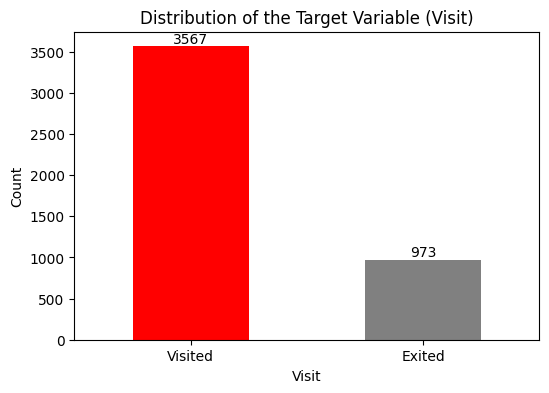

In [ ]:
# Distribution of the target variable
target_distribution = df['Visit'].value_counts()

# Debug: Print the target_distribution to check its contents
print(target_distribution)

# Create a bar plot
plt.figure(figsize=(6, 4))
ax = target_distribution.plot(kind='bar', color=['red', 'grey'])
plt.title('Distribution of the Target Variable (Visit)')
plt.xlabel('Visit')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Annotate the bars with their respective counts
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(int(i.get_height())), ha='center', va='bottom')

plt.show()

In [ ]:
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Iterate through the entire correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]

        # Check if the correlation value is greater than 0.85
        if abs(corr_value) > 0.85:
            print(f"Highly correlated columns: {col1} and {col2}, Correlation: {corr_value}")

Highly correlated columns: ToolPer_Usefulness and ToolPer_Trust_Det, Correlation: 0.8848337950043077


In [ ]:
original_dataset = df.copy()

# Data Preparation

In [ ]:
## tranform Dem_Age to its original format
train['Dem_Age'] = train['Dem_Age'] + 18
test['Dem_Age'] = test['Dem_Age'] + 18
df = pd.concat([train, test], ignore_index=True)

# Descriptive Analysis

In [ ]:
# "Dem_Gender": 0 = male; 1 = female
# "Dem_Education": 1 = high school; 2 = some college; 3 = associates degree; 4 = bachelor’s degree, etc.
df.groupby(["Dem_Gender", "Dem_Education"]).mean()

<ipython-input-22-d41f002be536>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["Dem_Gender", "Dem_Education"]).mean()


Tool_Det_Accuracy  Tool_Det_Time  Threat_Domain  \
Dem_Gender Dem_Education                                                    
0          1                       0.750000       0.000000       0.250000   
           2                       0.492308       0.369231       0.753846   
           3                       0.487936       0.517426       0.466488   
           4                       0.606061       0.606061       0.363636   
           5                       0.568182       0.500000       0.454545   
           6                       0.588235       0.529412       0.882353   
           7                       0.500000       0.750000       0.750000   
1          1                       0.333333       0.666667       0.666667   
           2                       0.512195       0.487805       0.536585   
           3                       0.491667       0.500000       0.550000   
           4                       0.529412       0.470588       0.411765   
           5                       0.656250       0.500000       0.687500   
           6                       0.607143       0.428571       0.821429   
           7                       0.285714       0.428571       0.857143   

                          Threat_Type  Threat_Cost    Dem_Age  \
Dem_Gender Dem_Education                                        
0          1                 0.250000     0.250000  40.750000   
           2                 0.492308     0.507692  37.953846   
           3                 0.506702     0.466488  39.718499   
           4                 0.515152     0.333333  44.787879   
           5                 0.545455     0.431818  50.818182   
           6                 0.470588     0.764706  59.647059   
           7                 0.750000     0.750000  47.500000   
1          1                 0.666667     0.666667  44.000000   
           2                 0.512195     0.512195  38.780488   
           3                 0.479167     0.533333  40.037500   
           4                 0.588235     0.647059  49.294118   
           5                 0.437500     0.406250  52.968750   
           6                 0.500000     0.678571  58.250000   
           7                 0.571429     0.714286  61.714286   

                          Exp_Web_Reliance  Exp_Trust_Web  Exp_Past_Loss  \
Dem_Gender Dem_Education                                                   
0          1                      6.716667       6.031250       3.583333   
           2                      7.469231       6.363077       2.405641   
           3                      7.581680       6.283177       2.181769   
           4                      7.914141       6.369697       2.652525   
           5                      7.711364       6.268182       2.462879   
           6                      7.549020       6.550000       1.854902   
           7                      8.333333       7.543750       3.158333   
1          1                      7.177778       6.625000       1.900000   
           2                      7.374797       6.503659       2.225203   
           3                      8.034861       6.570833       2.093611   
           4                      8.147059       6.552941       2.156863   
           5                      7.789583       6.042969       2.455208   
           6                      7.922619       6.493750       1.942857   
           7                      8.542857       7.082143       3.223810   

                          Exp_Past_Enc  ...  ThreatPer_Sus  ThreatPer_Sev  \
Dem_Gender Dem_Education                ...                                 
0          1                  3.416667  ...       5.368750       7.725000   
           2                  2.841026  ...       4.937308       6.276154   
           3                  2.618231  ...       4.716086       6.253619   
           4                  2.553535  ...       4.665152       6.131818   
           5                  2.737121  ...       4.762500       6.566477

In [ ]:
# "Threat_Type": 0 = spoof; 1 = concocted
# "Threat_Domain": 0 = pharmacy; 1 = bank
df.groupby(["Threat_Type", "Threat_Domain"]).mean()

<ipython-input-23-594d5080a6a6>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["Threat_Type", "Threat_Domain"]).mean()


Tool_Det_Accuracy  Tool_Det_Time  Threat_Cost  \
Threat_Type Threat_Domain                                                  
0           0                       0.523585       0.504717     0.500000   
            1                       0.512397       0.495868     0.504132   
1           0                       0.514423       0.509615     0.490385   
            1                       0.491870       0.483740     0.500000   

                           Dem_Gender    Dem_Age  Dem_Education  \
Threat_Type Threat_Domain                                         
0           0                0.391509  40.886792       3.183962   
            1                0.433884  42.636364       3.347107   
1           0                0.341346  41.774038       3.221154   
            1                0.443089  43.150407       3.373984   

                           Exp_Web_Reliance  Exp_Trust_Web  Exp_Past_Loss  \
Threat_Type Threat_Domain                                                   
0           0                      7.794025       6.420283       2.384906   
            1                      7.680165       6.444525       2.152755   
1           0                      7.859295       6.445433       2.316026   
            1                      7.636043       6.289634       2.064499   

                           Exp_Past_Enc  ...  ThreatPer_Sus  ThreatPer_Sev  \
Threat_Type Threat_Domain                ...                                 
0           0                  2.583491  ...       4.941274       6.124175   
            1                  2.405923  ...       4.833264       6.294628   
1           0                  2.565064  ...       4.926202       6.131851   
            1                  2.423035  ...       4.719512       6.411992   

                           Exp_Self_Eff  ToolPer_Effort_Req  \
Threat_Type Threat_Domain                                     
0           0                  6.494104            4.235259   
            1                  6.564669            4.211880   
1           0                  6.414303            4.125721   
            1                  6.255691            4.214126   

                           ToolPer_Cost_Det_Error  ToolPer_Usefulness  \
Threat_Type Threat_Domain                                               
0           0                            5.097327            5.558608   
            1                            5.524656            5.838740   
1           0                            5.226442            5.921995   
            1                            5.095122            5.861789   

                           ToolPer_Trust_Det  Exp_Fam_Dom  Exp_Fam_Site  \
Threat_Type Threat_Domain                                                 
0           0                       5.458137     2.198585      2.564717   
            1                       5.642872     4.938843      2.203058   
1           0                       5.793870     2.340865      1.252981   
            1                       5.651321     4.430488      1.375122   

                           Tool_Warning  
Threat_Type Threat_Domain                
0           0                  0.669811  
            1                  0.652893  
1           0                  0.664423  
            1                  0.668293  

[4 rows x 24 columns]

<Axes: xlabel='Visit', ylabel='Dem_Age'>

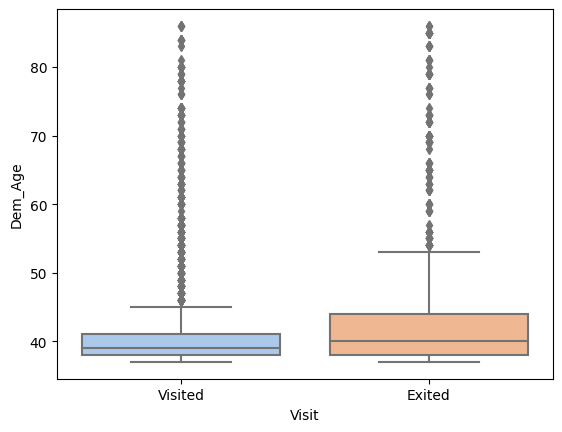

In [ ]:
# barplot with age
sns.boxplot(x = "Visit", y = "Dem_Age", data = df)

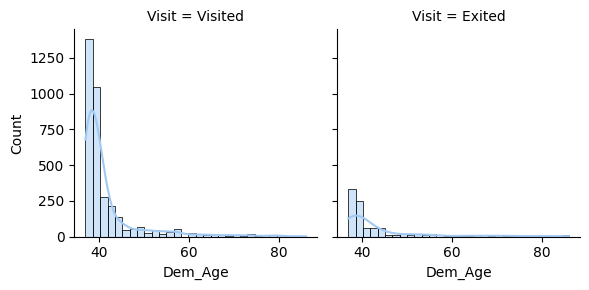

In [ ]:
# Draw two histograms of age separated by Visit.
g = sns.FacetGrid(df, col = "Visit")
g = g.map(sns.histplot,  "Dem_Age", bins = 30, kde = True)

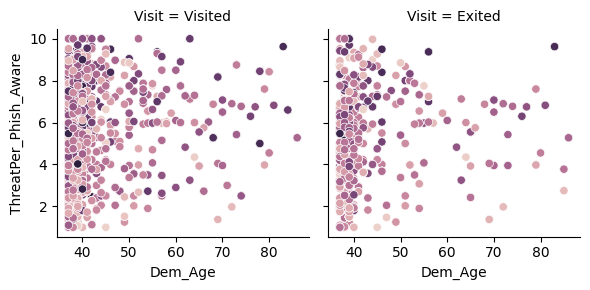

In [ ]:
# Draw two scatterplot of age and phishing awareness, phishing susceptibility separated by visit.
# color represents the level of phishing susceptibility
g = sns.FacetGrid(df, col = "Visit")
g = g.map(sns.scatterplot,  "Dem_Age", "ThreatPer_Phish_Aware", "ThreatPer_Sus")

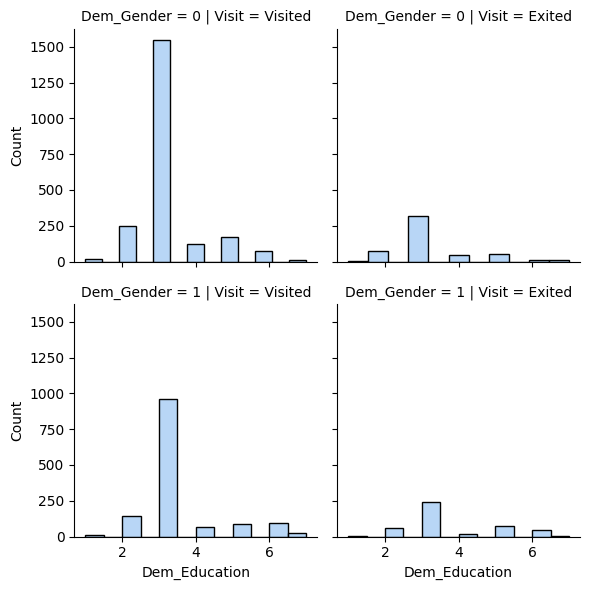

In [ ]:
# Plot based on gender and education; Gender: 0 = male, 1 = female
g = sns.FacetGrid(df, col = "Visit", row = "Dem_Gender")
g = g.map(sns.histplot, "Dem_Education")

<Axes: xlabel='ThreatPer_Sus', ylabel='Exp_Past_Loss'>

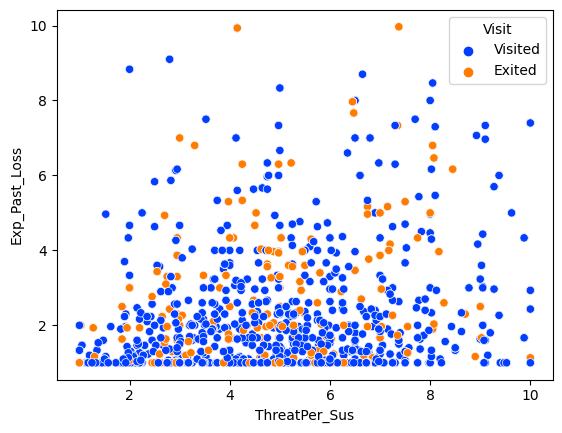

In [ ]:
# scatterplot of past loss and phishing susceptibility
sns.scatterplot(x = "ThreatPer_Sus", y = "Exp_Past_Loss",
                     hue = "Visit",
                     palette="bright",
                     data = df)

<Axes: xlabel='Dem_Education', ylabel='Exp_Past_Enc'>

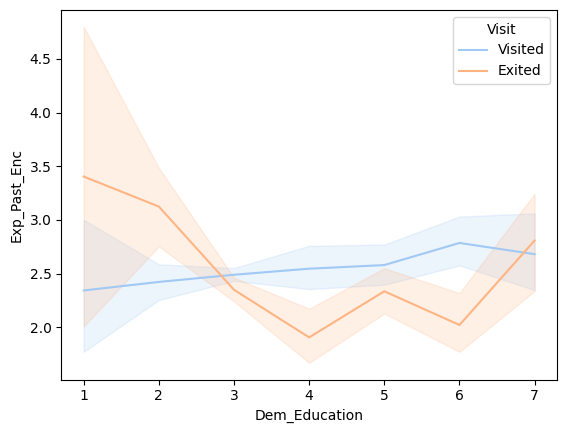

In [ ]:
# lineplot of education and past encounters
sns.lineplot(x = "Dem_Education", y = "Exp_Past_Enc",
                     hue = 'Visit',
                     data = df)

# Predictive Analysis - Classification Modelling

In [ ]:
print(train.Visit.value_counts()/train.Visit.count())

Visited    0.789
Exited     0.211
Name: Visit, dtype: float64


- Since it is not highly skewed towards Visited (< 95%), we choose not to balance the sampling.

In [238]:
X_train = train.drop(target_name, axis = 1)
y_train = train[target_name]
X_test = test.drop(target_name, axis = 1)
y_test = test[target_name]

## Model 1: Decision Trees
- GridSearchCV for parameter tuning

In [ ]:
from scipy.stats import uniform, randint
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

In [ ]:
target_name = "Visit"
X = train.drop(target_name, axis = 1)
y = train[target_name]

fnames = list(X.columns)
print(fnames)
findex = X.index

cnames = np.sort(y.unique())
cnames = [str(x) for x in cnames]

print(cnames)

['Tool_Det_Accuracy', 'Tool_Det_Time', 'Threat_Domain', 'Threat_Type', 'Threat_Cost', 'Dem_Gender', 'Dem_Age', 'Dem_Education', 'Exp_Web_Reliance', 'Exp_Trust_Web', 'Exp_Past_Loss', 'Exp_Past_Enc', 'Exp_Risk_Prop', 'Exp_Sec_Habit', 'Exp_Trust_Inst', 'ThreatPer_Phish_Aware', 'ThreatPer_Sus', 'ThreatPer_Sev', 'Exp_Self_Eff', 'ToolPer_Effort_Req', 'ToolPer_Cost_Det_Error', 'ToolPer_Usefulness', 'ToolPer_Trust_Det', 'Exp_Fam_Dom', 'Exp_Fam_Site', 'Tool_Warning']
['Exited', 'Visited']


In [ ]:
scv = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 1)

In [ ]:
# use gridsearchCV to find the best model
dt = DecisionTreeClassifier(random_state = 1)

param_rand = {'max_depth': randint(5, 10),
              'criterion': ('entropy', 'gini'),
              'min_impurity_decrease': uniform(0.001, 0.002) }

# Use the n_iter to control the number of paramter combinations.
rand_clf = RandomizedSearchCV(dt,
                              param_rand,
                              n_iter = 50,
                              random_state = 1,
                              cv = scv,
                              verbose = 3,
                              scoring = 'accuracy',
                              return_train_score = True)
rand_clf.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
[CV 1/4] END criterion=gini, max_depth=8, min_impurity_decrease=0.002440648986884316;, score=(train=0.848, test=0.829) total time=   0.1s
[CV 2/4] END criterion=gini, max_depth=8, min_impurity_decrease=0.002440648986884316;, score=(train=0.834, test=0.796) total time=   0.1s
[CV 3/4] END criterion=gini, max_depth=8, min_impurity_decrease=0.002440648986884316;, score=(train=0.825, test=0.795) total time=   0.1s
[CV 4/4] END criterion=gini, max_depth=8, min_impurity_decrease=0.002440648986884316;, score=(train=0.842, test=0.796) total time=   0.1s
[CV 1/4] END criterion=gini, max_depth=6, min_impurity_decrease=0.0016046651452636795;, score=(train=0.848, test=0.817) total time=   0.1s
[CV 2/4] END criterion=gini, max_depth=6, min_impurity_decrease=0.0016046651452636795;, score=(train=0.853, test=0.805) total time=   0.1s
[CV 3/4] END criterion=gini, max_depth=6, min_impurity_decrease=0.0016046651452636795;, score=(train=0.848, 

RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=1, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=1), n_iter=50,
                   param_distributions={'criterion': ('entropy', 'gini'),
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d5932f5ae30>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d592827f520>},
                   random_state=1, return_train_score=True, scoring='accuracy',
                   verbose=3)

In [ ]:
# Print the tuned parameters and score
print(f"Tuned Decision Tree Parameters: {rand_clf.best_params_}")
print(f"Best score is {rand_clf.best_score_:.2%}")

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_impurity_decrease': 0.0014089044994630348}
Best score is 82.57%


In [ ]:
y_pred_grid = clf_grid.predict(X_test)
print(f"The test data performance for the best model is {accuracy_score(y_test, y_pred_grid):.2%}")
print(classification_report(y_test, y_pred_grid, digits = 4))

The test data performance for the best model is 83.05%
              precision    recall  f1-score   support

      Exited     0.6756    0.4471    0.5381       340
     Visited     0.8570    0.9392    0.8962      1200

    accuracy                         0.8305      1540
   macro avg     0.7663    0.6931    0.7171      1540
weighted avg     0.8170    0.8305    0.8171      1540



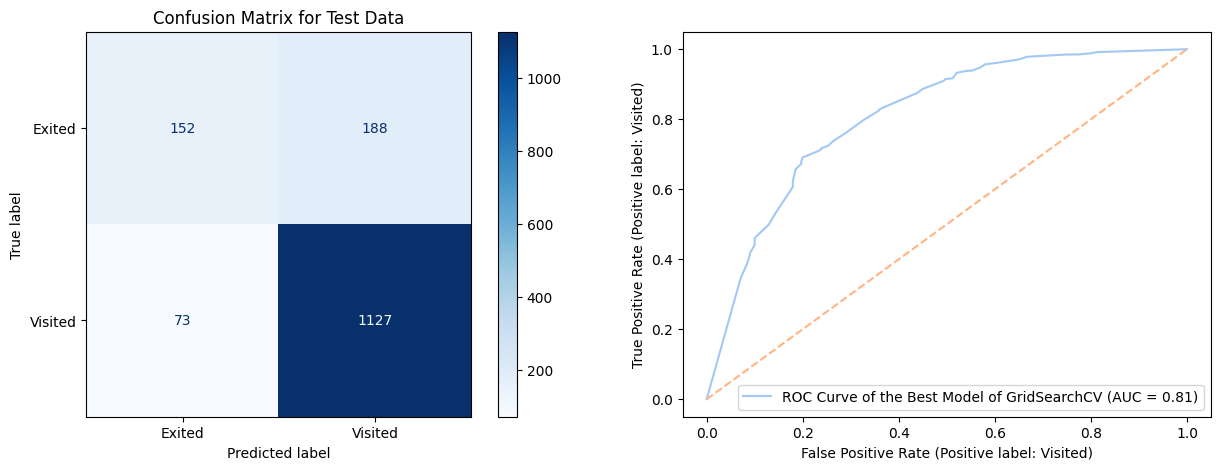

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_grid)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=cnames)
cm_display.plot(cmap=plt.cm.Blues, values_format="d", ax=axes[0])
axes[0].set_title("Confusion Matrix for Test Data")

# Plot the ROC curve
disp = RocCurveDisplay.from_estimator(clf_grid, X_test, y_test, name="ROC Curve of the Best Model of GridSearchCV", ax=axes[1])
axes[1].plot([0, 1], [0, 1], linestyle='--')

# Save both plots to separate files
fig.savefig("DT_ConfusionMatrix_Test.pdf")
fig.savefig("DT_ROC_Grid.pdf")

# Show the plots
plt.show()

## Model 2: K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Train
knn = KNeighborsClassifier(n_neighbors = 5, metric='euclidean') # could also set metric = 'manhattan'
knn.fit(X_train, y_train)

# Test
y_test_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_test_knn)
print(f"The test data performance for the K-nearest neighbor is {acc_knn:.2%}")
print(classification_report(y_test, y_test_knn, digits = 4))

The test data performance for the K-nearest neighbor is 80.91%
              precision    recall  f1-score   support

      Exited     0.6065    0.3853    0.4712       340
     Visited     0.8421    0.9292    0.8835      1200

    accuracy                         0.8091      1540
   macro avg     0.7243    0.6572    0.6774      1540
weighted avg     0.7901    0.8091    0.7925      1540



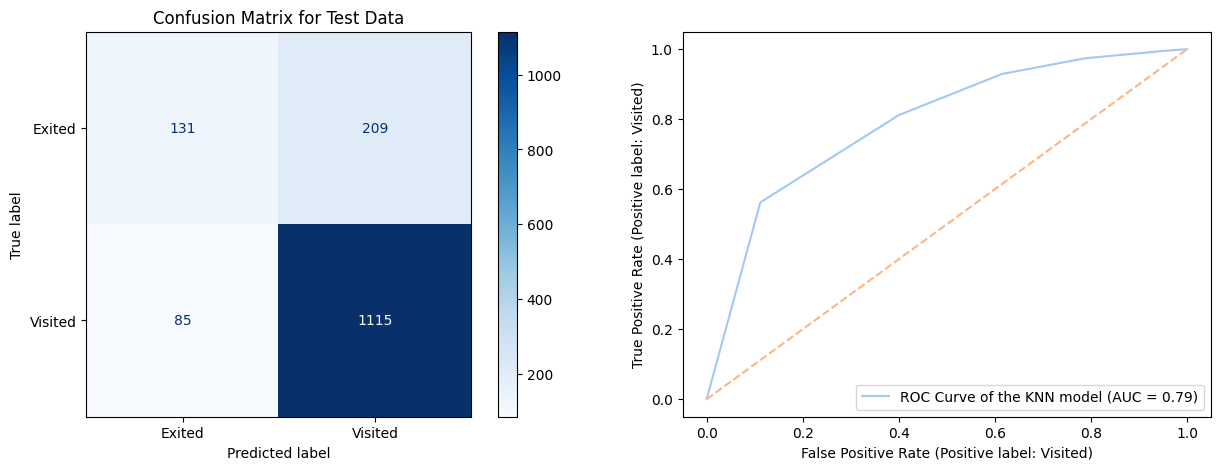

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_knn)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=cnames)
cm_display.plot(cmap=plt.cm.Blues, values_format="d", ax=axes[0])
axes[0].set_title("Confusion Matrix for Test Data")

# Plot the ROC curve
disp = RocCurveDisplay.from_estimator(knn, X_test, y_test, name="ROC Curve of the KNN model", ax=axes[1])
axes[1].plot([0, 1], [0, 1], linestyle='--')

# Save both plots to separate files
fig.savefig("Knn_ConfusionMatrix_Test.pdf")
fig.savefig("Knn_ROC_Grid.pdf")

# Show the plots
plt.show()

## Model 3: Logistic Regression
- Polynomial

In [206]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
# Create Polynomial features
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [209]:
# Train
lg_poly = LogisticRegression(random_state = 42)
lg_poly.fit(X_train_poly, y_train)

# Test
y_pred_lgpoly= lg_poly.predict(X_test_poly)
acc_log_poly = accuracy_score(y_test, y_pred_lgpoly)
print(f"The test data performance for the logistic regression is {acc_log_poly:.2%}")
print(classification_report(y_test, y_pred_lgpoly, digits = 4))

The test data performance for the logistic regression is 80.06%
              precision    recall  f1-score   support

      Exited     0.6122    0.2647    0.3696       340
     Visited     0.8205    0.9525    0.8816      1200

    accuracy                         0.8006      1540
   macro avg     0.7164    0.6086    0.6256      1540
weighted avg     0.7745    0.8006    0.7686      1540



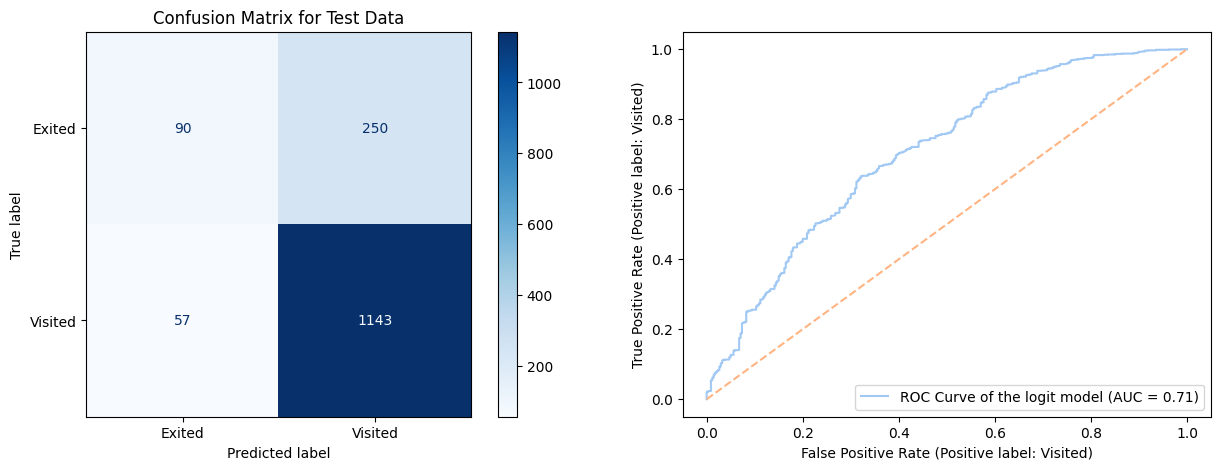

In [210]:
conf_matrix = confusion_matrix(y_test, y_pred_lgpoly)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=cnames)
cm_display.plot(cmap=plt.cm.Blues, values_format="d", ax=axes[0])
axes[0].set_title("Confusion Matrix for Test Data")

# Plot the ROC curve
disp = RocCurveDisplay.from_estimator(lg_poly, X_test_poly, y_test, name="ROC Curve of the logit model", ax=axes[1])
axes[1].plot([0, 1], [0, 1], linestyle='--')

# Save both plots to separate files
fig.savefig("lg_ConfusionMatrix_Test.pdf")
fig.savefig("lg_ROC_Grid.pdf")

# Show the plots
plt.show()

## Model 4: Support Vector Machines (SVM)
- RBF (Gaussian) Kernel
- RandomizedSearchCV for parameter tuning

In [252]:
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy.stats import uniform
import numpy as np

In [261]:
# Create PolynomialFeatures and StandardScaler instances
poly_features = PolynomialFeatures()
scaler = StandardScaler()

# Apply feature transformation to the training data
X_train_poly = poly_features.fit_transform(X_train)
X_train_scaled = scaler.fit_transform(X_train_poly)

# Define the hyperparameter search space for the SVM model
param_dist = {
    'gamma': uniform(0.01, 0.99),
    'C': uniform(1, 7),
}

# Create an SVM model
svm_model = SVC(kernel='rbf', random_state=42, probability=True)

# Create a RandomizedSearchCV object
rand_search = RandomizedSearchCV(
    svm_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    verbose=3,
    random_state=1,
    scoring='accuracy',
    return_train_score=True,
)

# Fit the SVM model with transformed training data
rand_search.fit(X_train_scaled, y_train)

# Apply feature transformation to the test data
X_test_poly = poly_features.transform(X_test)
X_test_scaled = scaler.transform(X_test_poly)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END C=3.919154032918018, gamma=0.7231212485077365;, score=(train=0.971, test=0.826) total time=   8.3s
[CV 2/3] END C=3.919154032918018, gamma=0.7231212485077365;, score=(train=0.974, test=0.843) total time=   3.2s
[CV 3/3] END C=3.919154032918018, gamma=0.7231212485077365;, score=(train=0.978, test=0.831) total time=   3.2s
[CV 1/3] END C=1.0008006237214142, gamma=0.30930924690552136;, score=(train=0.971, test=0.826) total time=   4.4s
[CV 2/3] END C=1.0008006237214142, gamma=0.30930924690552136;, score=(train=0.971, test=0.841) total time=   3.0s
[CV 3/3] END C=1.0008006237214142, gamma=0.30930924690552136;, score=(train=0.976, test=0.831) total time=   3.0s
[CV 1/3] END C=2.027291235719791, gamma=0.10141520882110981;, score=(train=0.971, test=0.828) total time=   3.4s
[CV 2/3] END C=2.027291235719791, gamma=0.10141520882110981;, score=(train=0.971, test=0.849) total time=   4.1s
[CV 3/3] END C=2.027291235719791, g

In [258]:
# Evaluate the best model with RBF kernel on the test set
best_svm_rbf = rand_search.best_estimator_
y_test_svm_rbf = best_svm_rbf.predict(X_test_scaled)
acc_rbf_svm = accuracy_score(y_test, y_test_svm_rbf)

# Print the test performance and classification report
print(f"The test data performance for the SVM with RBF kernel is {acc_rbf_svm:.2%}")
print(classification_report(y_test, y_test_svm_rbf, digits=4))

The test data performance for the SVM with RBF kernel is 83.83%
              precision    recall  f1-score   support

      Exited     0.7097    0.4529    0.5530       340
     Visited     0.8594    0.9475    0.9013      1200

    accuracy                         0.8383      1540
   macro avg     0.7845    0.7002    0.7271      1540
weighted avg     0.8264    0.8383    0.8244      1540



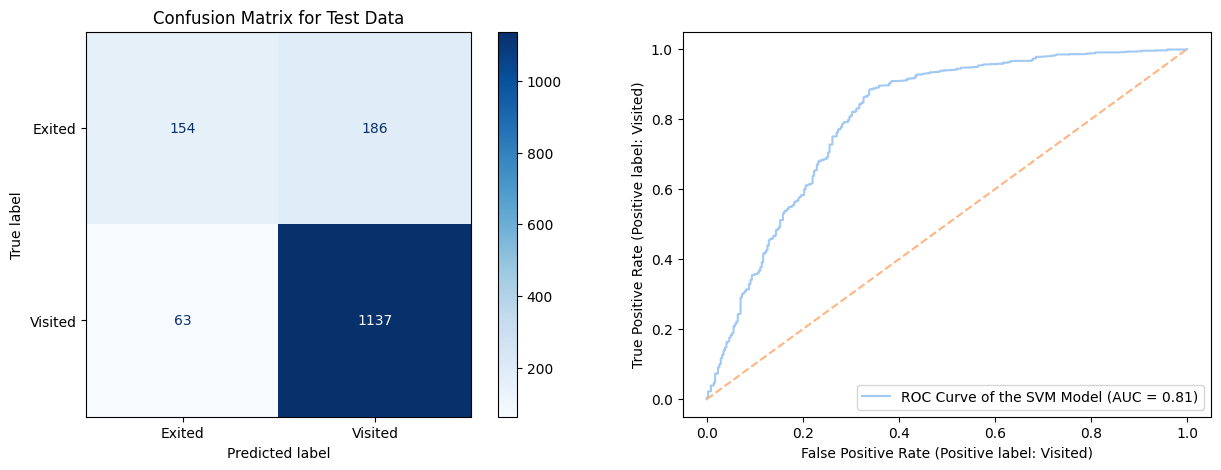

In [262]:
conf_matrix = confusion_matrix(y_test, y_test_svm_rbf)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=cnames)
cm_display.plot(cmap=plt.cm.Blues, values_format="d", ax=axes[0])
axes[0].set_title("Confusion Matrix for Test Data")

# Plot the ROC curve
disp = RocCurveDisplay.from_estimator(best_svm_rbf, X_test_scaled, y_test, name="ROC Curve of the SVM Model", ax=axes[1])
axes[1].plot([0, 1], [0, 1], linestyle='--')

# Save both plots to separate files
fig.savefig("svm_ConfusionMatrix_Test.pdf")
fig.savefig("svm_ROC_Grid.pdf")

# Show the plots
plt.show()